In [ ]:
from ultralytics import YOLO

In [ ]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolov8n.pt")

In [ ]:
# Train the model using the 'coco8.yaml' dataset for 3 epochs
results = model.train(data="coco8.yaml", epochs=3)

In [ ]:
# Evaluate the model's performance on the validation set
results = model.val()

In [ ]:
# Perform object detection on an image using the model
results = model("https://ultralytics.com/images/bus.jpg")

In [ ]:
# Export the model to ONNX format
success = model.export(format="onnx")

In [ ]:
# Export the model to TFLite format
success = model.export(format="tflite", int8=True, batch=1)

In [ ]:
# Export the model to TFLite format
success = model.export(format="edgetpu")

Test

In [ ]:
import os
import yaml

from ultralytics import YOLO

In [ ]:
model = YOLO('datasets/bioview-lizards_TRAIN/run/train/weights/best.pt')

In [ ]:
train_path = os.path.join(os.getcwd(), 'datasets/bioview-lizards_TRAIN')
yaml_name = 'cuantization.yaml'
yaml_path = os.path.join('', yaml_name)

yaml_content = {
    'train': os.path.join(train_path, "dataset/train/images"),
    'val':   os.path.join(train_path, "dataset/train/images"),
    'names': {
        0: "Lizard"
    }
}

# Crear o modificar el archivo YAML
with open(yaml_path, 'w') as yaml_file:
    yaml.dump(yaml_content, yaml_file, default_flow_style=False)

print(f"Archivo YAML creado o modificado en '{yaml_path}'.")

In [ ]:
# Export the model to TFLite format
success = model.export(format="edgetpu",
                       data="cuantization.yaml")

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading final-resources/models/yolov8/best_full_integer_quant.tflite for TensorFlow Lite inference...

image 1/1 /home/qcienmed/mmr689/yolo-consumptions/final-resources/data/images/img_20221225_024503.jpg: 640x640 16 Lizards, 1468.7ms
Speed: 218.3ms preprocess, 1468.7ms inference, 2923.0ms postprocess per image at shape (1, 3, 640, 640)


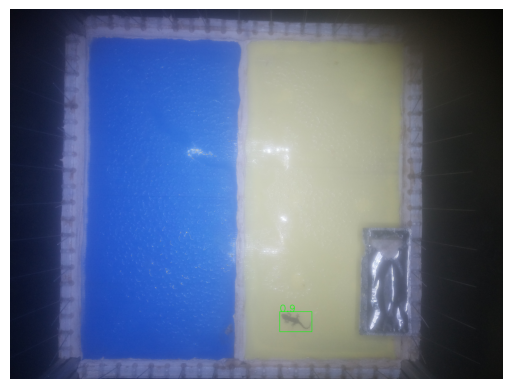

In [2]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

img_path = 'final-resources/data/images'
img_name = 'img_20221225_024503.jpg'
img_path = os.path.join(img_path, img_name)

model_path = 'final-resources/models/yolov8'
model_name = 'best_full_integer_quant'
model_name += '.tflite'
model_path = os.path.join(model_path, model_name)


model = YOLO(model_path)

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = model.predict(img_path, task='detect')[0]

for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score >= 0.5:
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
        cv2.putText(img_rgb, str(round(score,1)), (int(x1), int(y1)),
                    cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 3, cv2.LINE_AA)

# Mostrar la imagen
plt.imshow(img_rgb)
plt.axis('off')
plt.show()